In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

In [7]:
files  = os.listdir("inputs")
files


['datafile (3).csv',
 'datafile (1).csv',
 'produce.csv',
 'datafile (2).csv',
 'datafile.csv']

In [16]:
temp = []
for i, file in enumerate(files):
    temp.append(pd.read_csv('inputs/'+file))

data=[]
data.append(pd.read_csv('inputs/datafile.csv'))
data.append(pd.read_csv('inputs/produce.csv'))
data.append(pd.read_csv('inputs/datafile (2).csv'))
data.append(pd.read_csv('inputs/datafile (1).csv'))
data.append(pd.read_csv('inputs/datafile (3).csv'))

In [18]:
data[0].head()


,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


In [19]:
production = pd.read_csv('inputs/'+'datafile (2).csv')
production.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [20]:
production.columns


Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [21]:
k = production[['Crop             ','Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11']].groupby('Crop             ')
index = list(k.indices.keys())
index[-8:-2]

['Total Foodgrains',
 'Total Fruits & Vegetables',
 'Total Non-Food grains ',
 'Total Oilseeds',
 'Total Pulses',
 'Total Spices']

Text(0, 0.5, 'Production in Quintal')

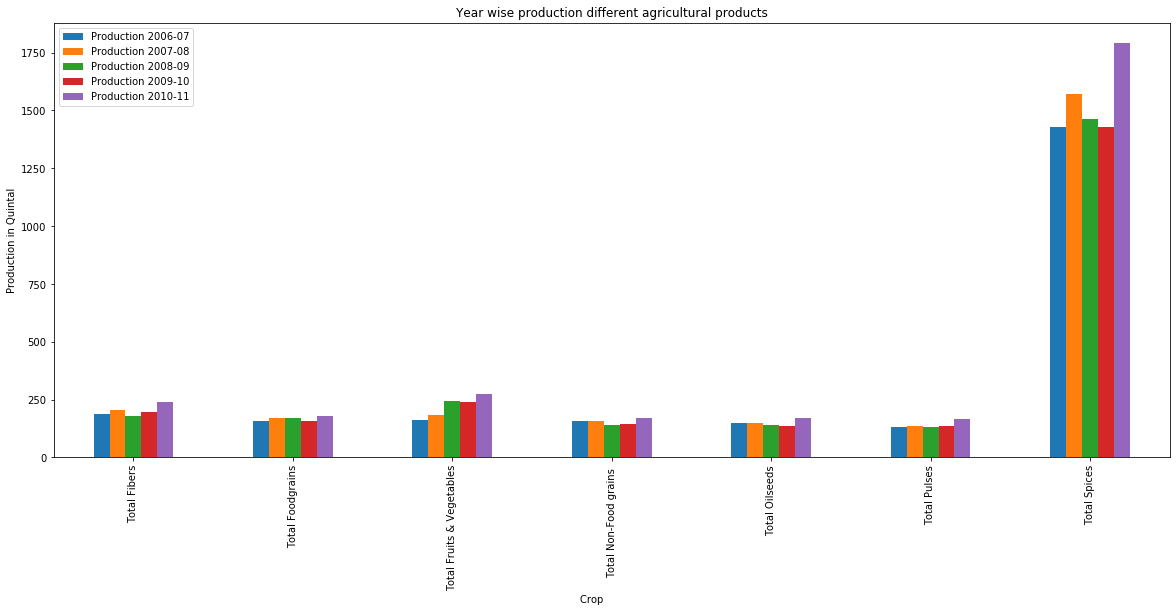

In [22]:
k.sum()[-9:-2].plot(figsize=(20,8), kind='bar');
plt.title('Year wise production different agricultural products')
plt.ylabel('Production in Quintal')

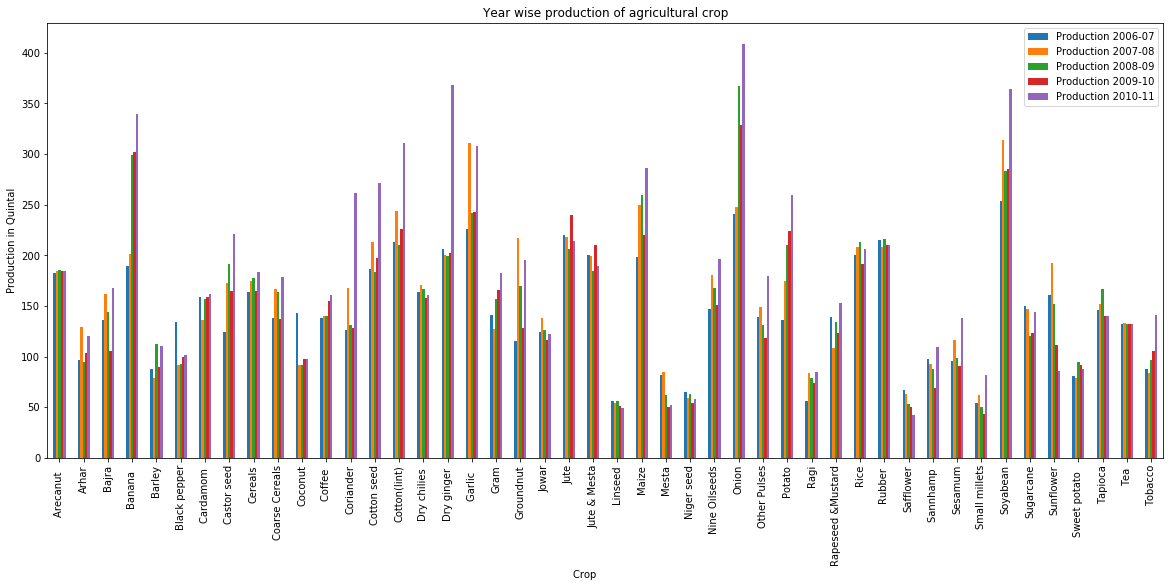

In [23]:
k.sum()[:-9].plot(figsize=(20,8), kind='bar');
plt.title('Year wise production of agricultural crop')
plt.ylabel('Production in Quintal');

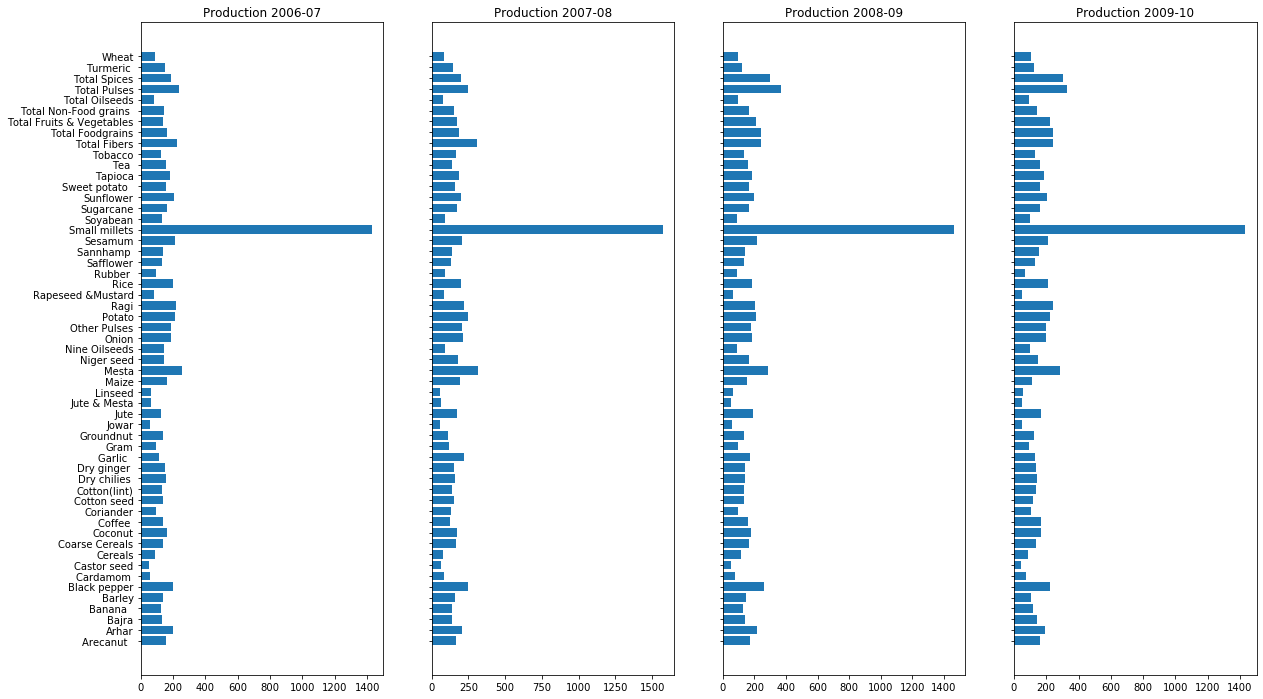

In [24]:
# k.mean().plot(figsize=(12,6), kind='bar');
# plt.figure(figsize=(12,6))
l = len(k['Crop             '])
fig, arraxes = plt.subplots(1,4, figsize=(12,12), sharey=True)
plt.setp(arraxes, yticks=range(len(index)), yticklabels = index)

for axes, p in zip(arraxes.flat,['Production 2006-07', 'Production 2007-08','Production 2008-09', 'Production 2009-10', 'Production 2010-11']):
    axes.barh(range(l), k[p].head())
    axes.set_title(p)
#     axes.tick_params(axis='x',  rotation=90)
#     axes.set_xticklabels(index)
fig.set_figwidth(20)

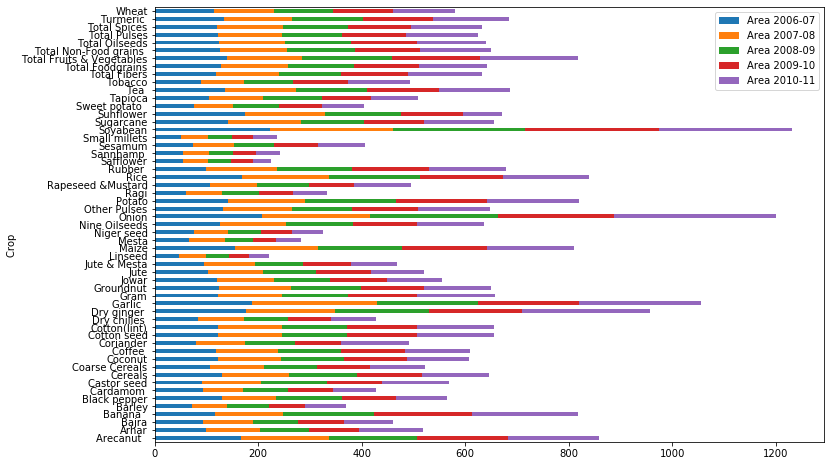

In [25]:
kc = production[['Crop             ','Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11']].groupby('Crop             ')
kc.sum().plot(figsize=(12,8), kind='barh', stacked= True);

# k.head()['Crop             '].values

In [26]:
data[2].describe()


,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,168.698182,182.629091,179.952727,173.749091,210.181818,116.025455,118.403636,120.530909,118.203636,127.216364,146.829091,153.774545,149.476364,147.427273,164.570909
std,179.503163,199.671545,187.409253,184.231322,232.535985,37.990960,41.287797,44.460177,44.976615,54.842653,144.836331,153.243102,141.412539,143.963743,160.925948
min,53.900000,54.400000,50.000000,42.900000,42.100000,47.900000,47.400000,43.600000,37.500000,36.100000,86.000000,75.300000,72.700000,80.700000,80.800000
25%,124.500000,122.200000,116.050000,105.350000,126.900000,92.550000,93.300000,93.200000,88.650000,90.650000,106.800000,116.800000,110.950000,108.300000,121.050000
50%,142.700000,160.100000,156.500000,140.300000,169.000000,120.700000,121.700000,121.900000,120.900000,129.400000,118.700000,124.500000,123.600000,122.100000,138.900000
75%,184.300000,200.100000,188.550000,197.050000,217.350000,131.050000,135.800000,136.250000,134.800000,147.950000,137.600000,154.400000,148.500000,142.800000,168.850000
max,1427.700000,1571.500000,1463.000000,1430.300000,1790.600000,222.700000,241.600000,254.500000,260.300000,314.700000,1176.600000,1247.700000,1156.800000,1172.100000,1310.800000


In [27]:
data[3].groupby('State').sum()


,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
State,,,,
Andhra Pradesh,200500.69,315029.07,14273.65,915.41
Bihar,13513.92,19857.70,404.43,42.95
Gujarat,79776.83,110820.34,7606.88,53.70
Haryana,44634.24,71525.72,3378.47,39.84
Karnataka,100129.18,149148.83,12102.17,1030.81
Madhya Pradesh,30954.72,57068.85,3641.79,46.82
Maharashtra,148360.96,210923.27,13169.10,789.50
Orissa,22961.59,34176.03,3329.18,35.43
Punjab,72147.43,131543.55,3478.42,131.63


In [28]:
cols = data[3].columns


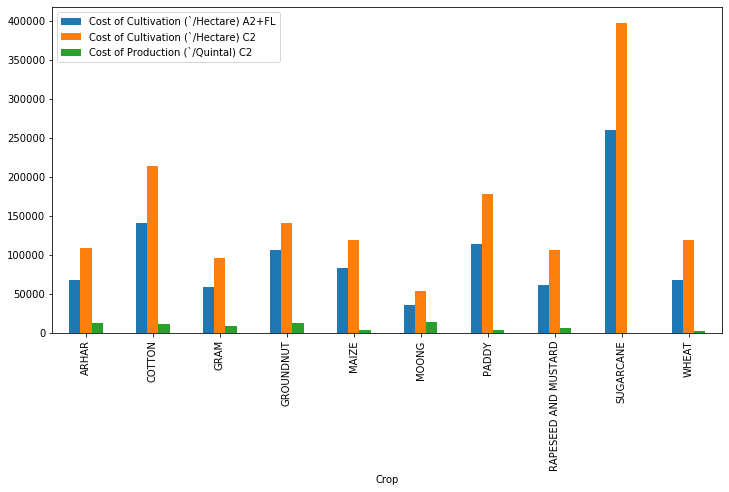

In [29]:
data[3].groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));


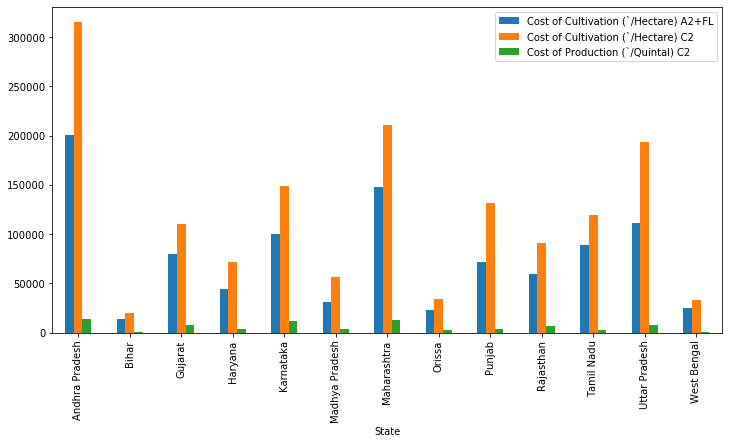

In [30]:
data[3].groupby('State')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));


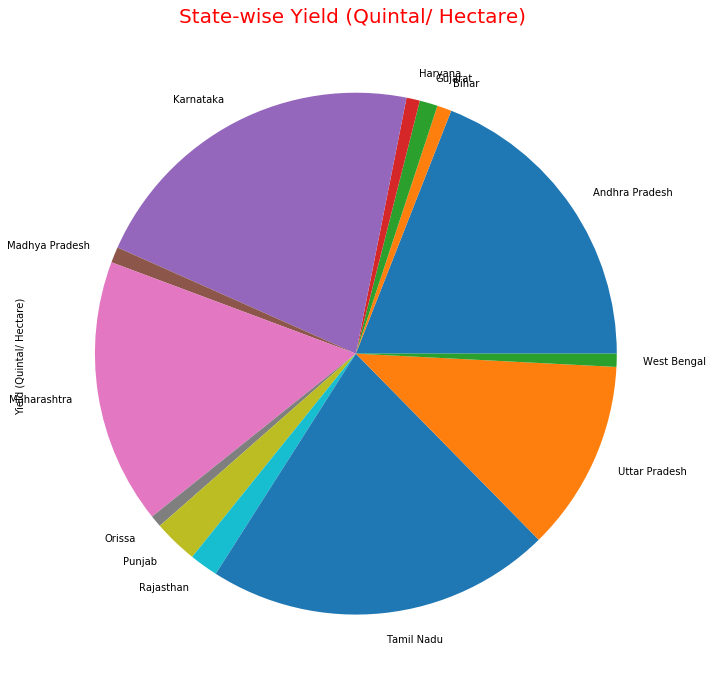

In [31]:
plt.title('State-wise '+cols[-1], color='red', fontsize=20)
data[3].groupby('State')[cols[-1]].sum().plot(kind='pie', figsize=(12,12));

In [32]:
data[4].head()


,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN


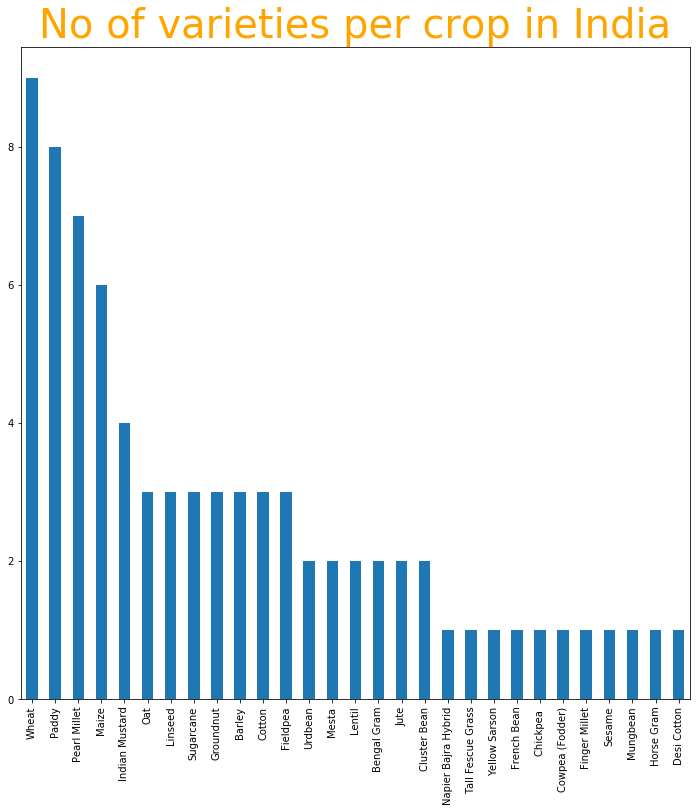

In [33]:
plt.title('No of varieties per crop in India', fontsize=40, color='orange')
data[4]['Crop'].value_counts().plot(kind='bar', figsize= (12,12));
